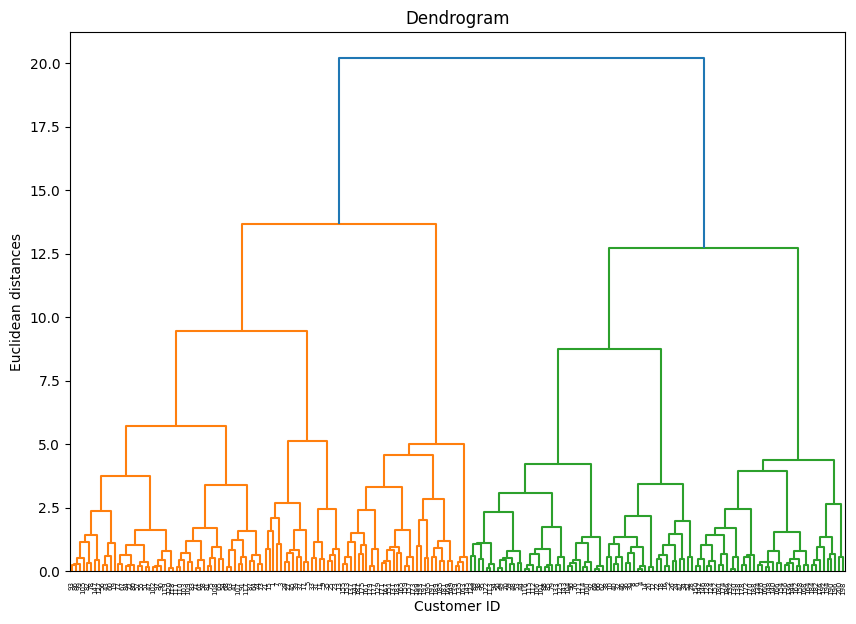

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

# Step 1: Pre-process the data
# Fill missing values (if any)
data.fillna(data.mean(numeric_only=True), inplace=True)

# Ensure numeric columns are of the correct type
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Annual Income (k$)'] = pd.to_numeric(data['Annual Income (k$)'], errors='coerce')
data['Spending Score (1-100)'] = pd.to_numeric(data['Spending Score (1-100)'], errors='coerce')

# Normalize the data
scaler = StandardScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Step 2: Apply label encoding to convert categorical values to numerical values
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])

# Step 3: Plot the dendrogram
# Perform hierarchical clustering
linked = linkage(data[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']], method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=data['CustomerID'].astype(str).values, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customer ID')
plt.ylabel('Euclidean distances')
plt.show()

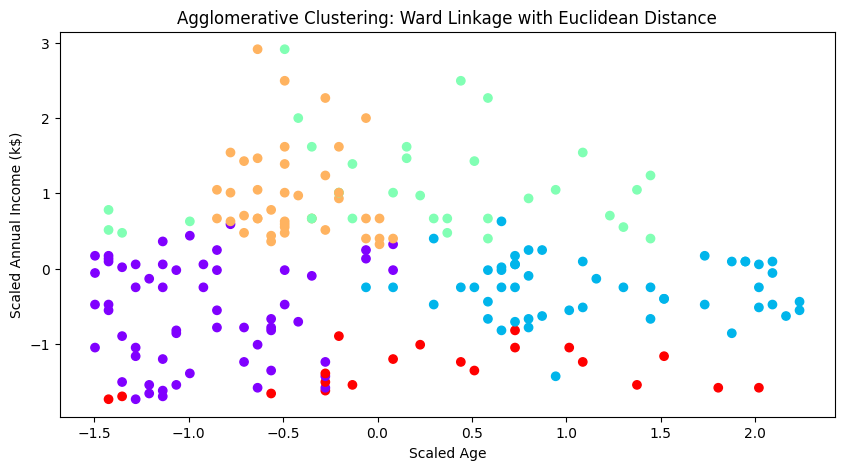

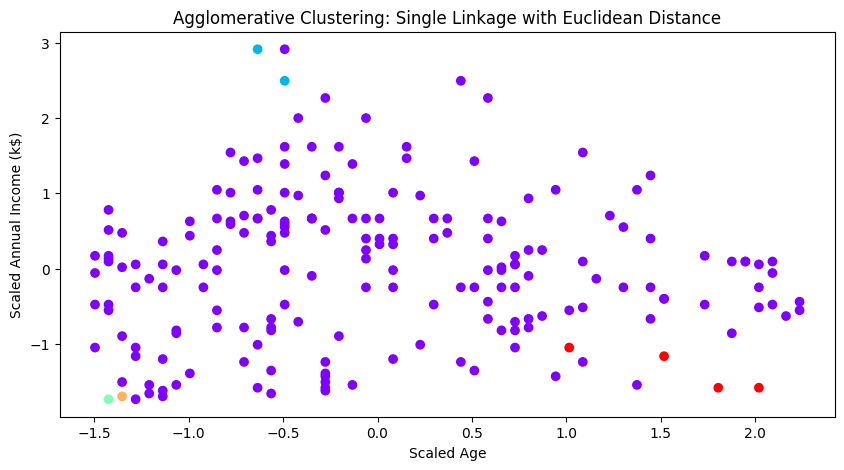

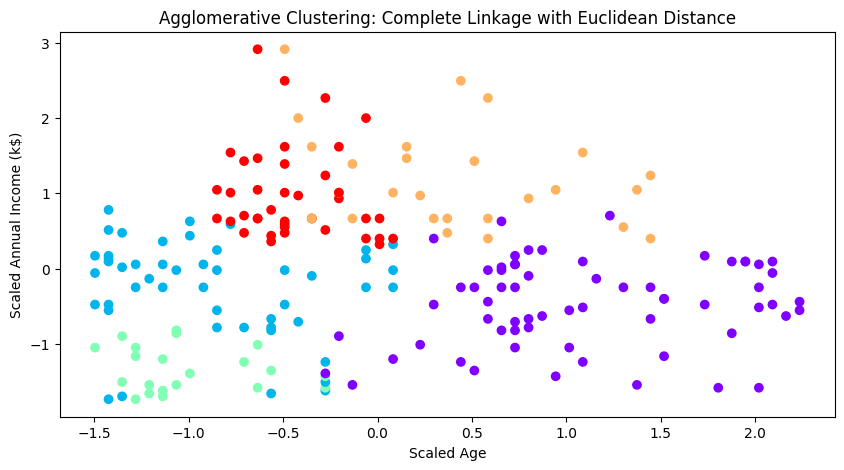

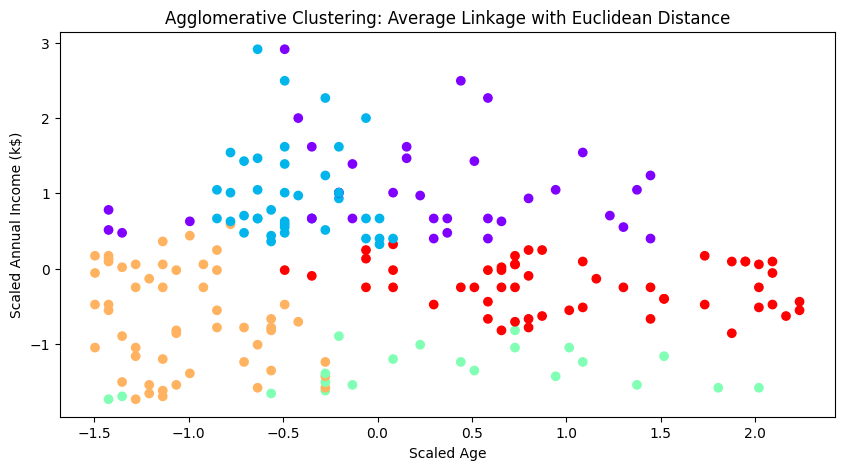

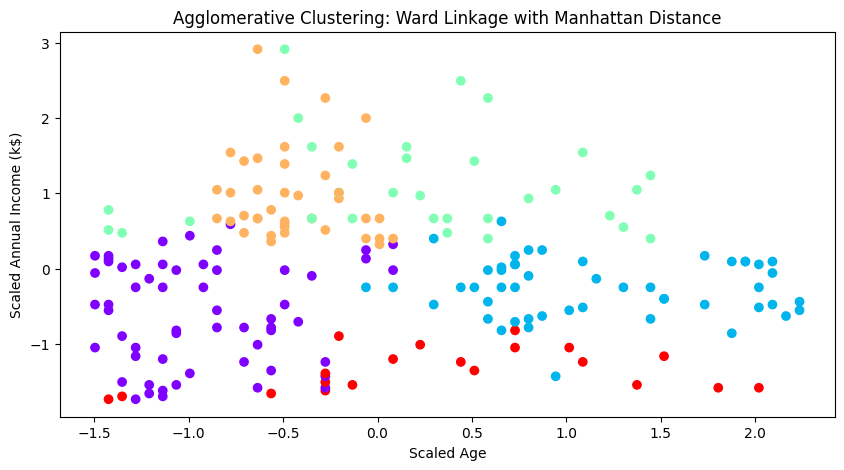

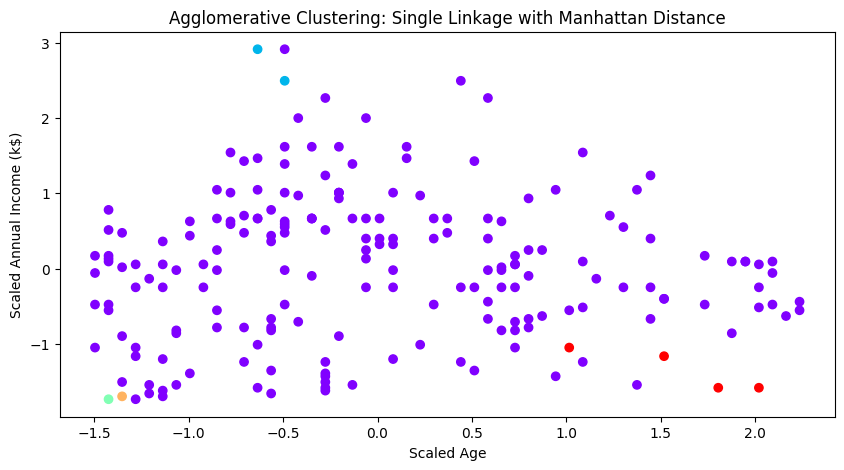

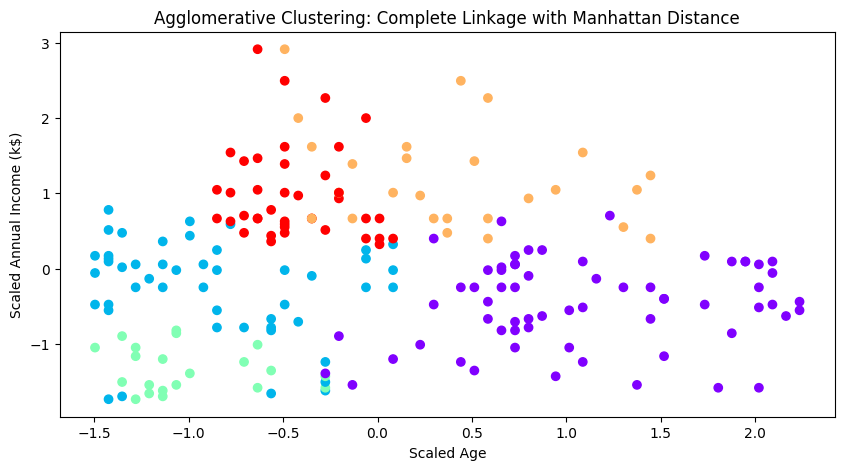

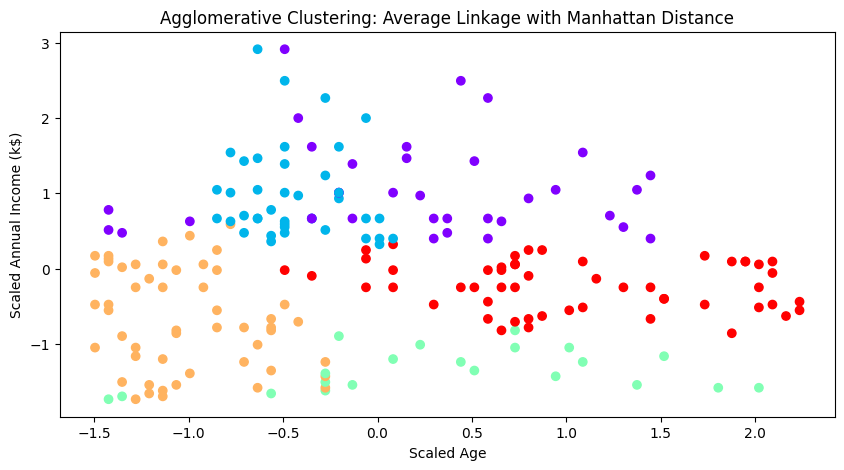

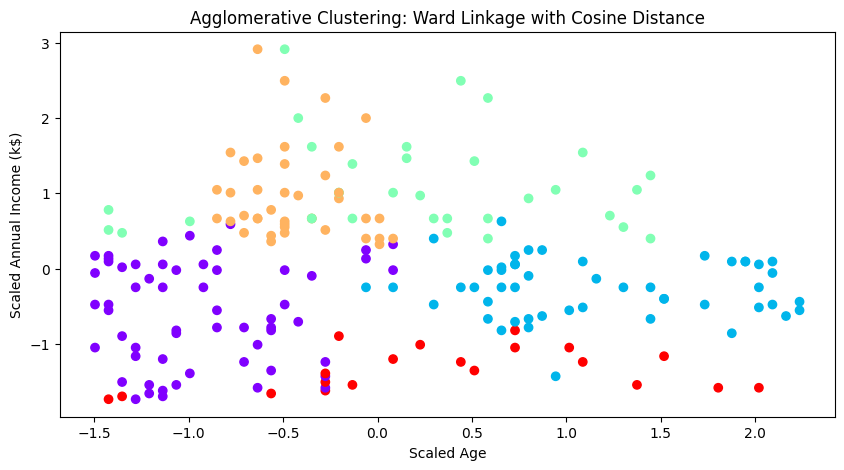

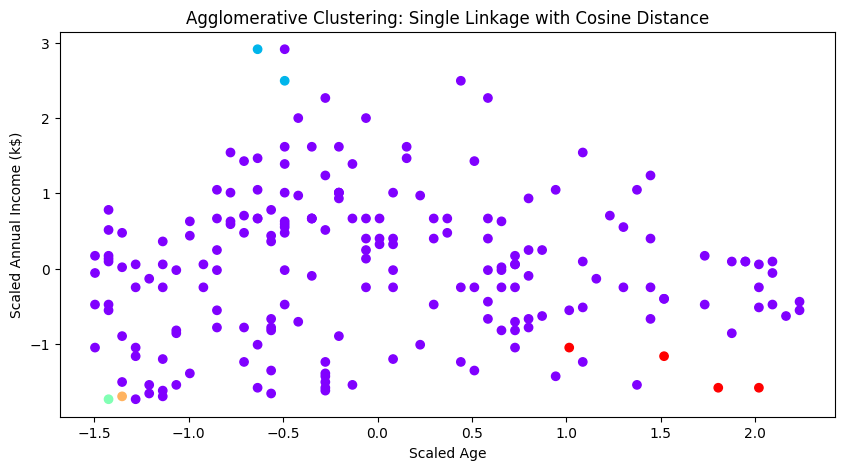

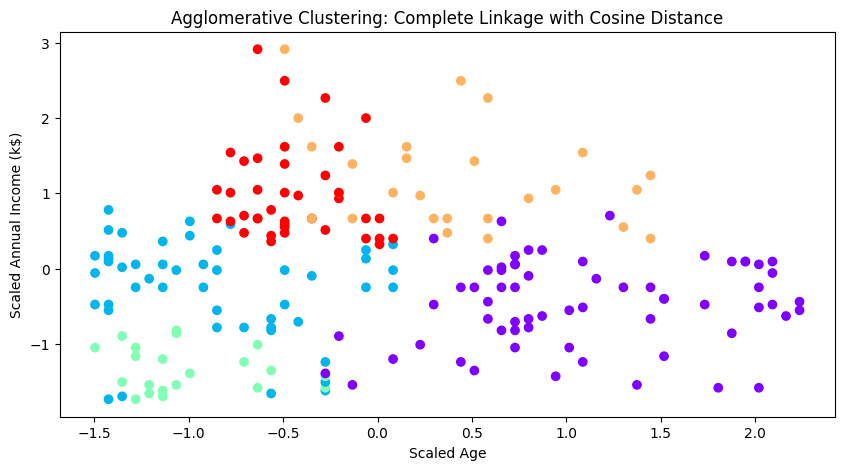

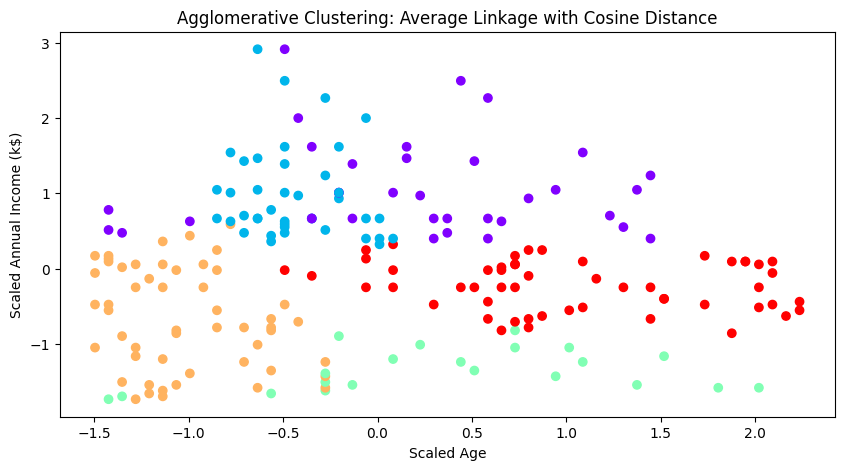

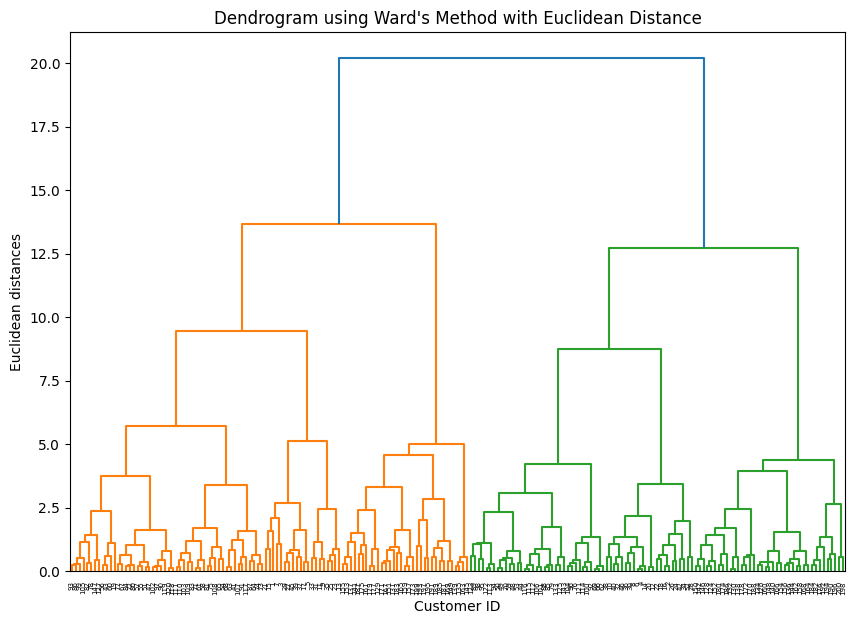

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

# Pre-process the data
data.fillna(data.mean(numeric_only=True), inplace=True)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Annual Income (k$)'] = pd.to_numeric(data['Annual Income (k$)'], errors='coerce')
data['Spending Score (1-100)'] = pd.to_numeric(data['Spending Score (1-100)'], errors='coerce')

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Apply label encoding to convert categorical values to numerical values
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])

# Combine encoded categorical and scaled numerical data
final_data = np.column_stack((data['Genre'], scaled_data))

# Define different distance metrics and linkage methods
distance_metrics = ['euclidean', 'manhattan', 'cosine']
linkage_methods = ['ward', 'single', 'complete', 'average']

# Perform Agglomerative Clustering for each combination of distance metric and linkage method
for metric in distance_metrics:
    for linkage_method in linkage_methods:
        clustering = AgglomerativeClustering(n_clusters=5, linkage=linkage_method)
        cluster_labels = clustering.fit_predict(final_data)

        # Plotting the results
        plt.figure(figsize=(10, 5))
        plt.title(f'Agglomerative Clustering: {linkage_method.capitalize()} Linkage with {metric.capitalize()} Distance')
        plt.scatter(final_data[:, 1], final_data[:, 2], c=cluster_labels, cmap='rainbow')
        plt.xlabel('Scaled Age')
        plt.ylabel('Scaled Annual Income (k$)')
        plt.show()

# Optionally, plot the dendrogram for one of the configurations (e.g., Ward's method with Euclidean distance)
linked = linkage(final_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=data['CustomerID'].astype(str).values, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram using Ward\'s Method with Euclidean Distance')
plt.xlabel('Customer ID')
plt.ylabel('Euclidean distances')
plt.show()

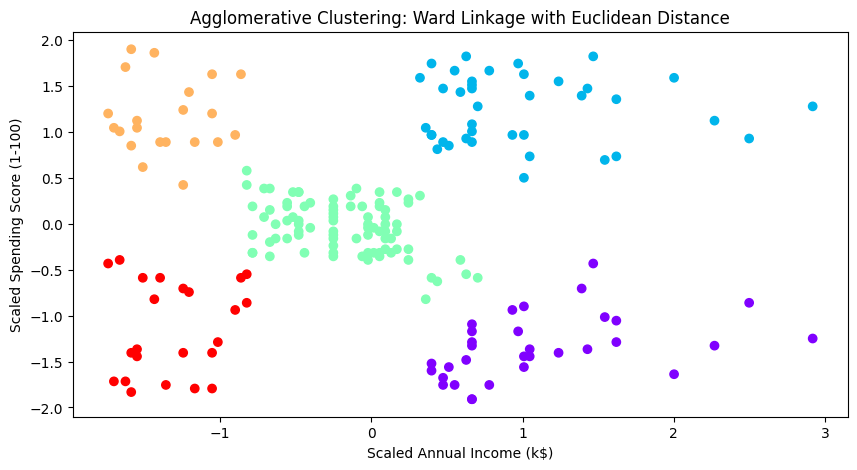

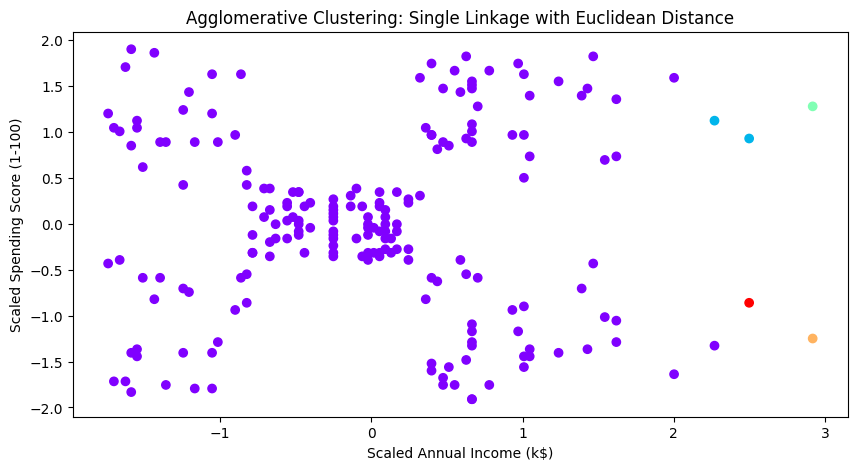

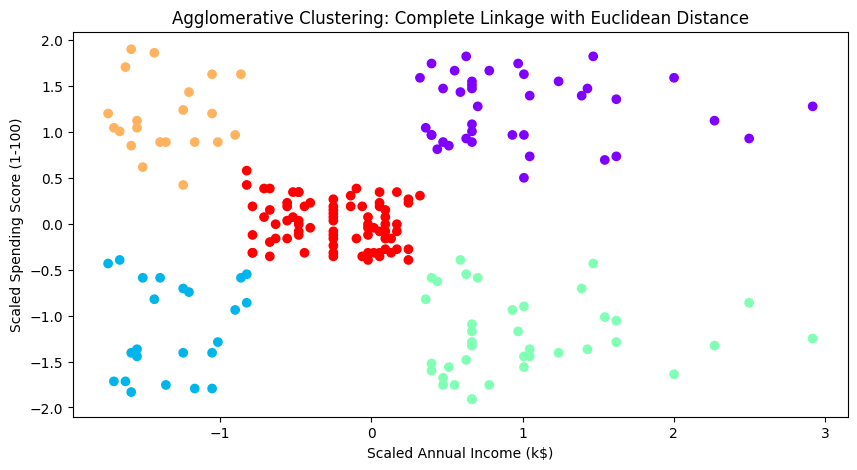

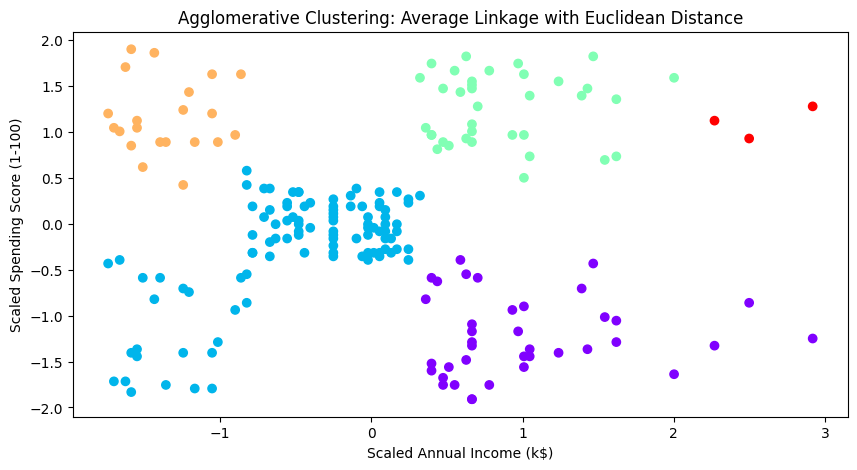

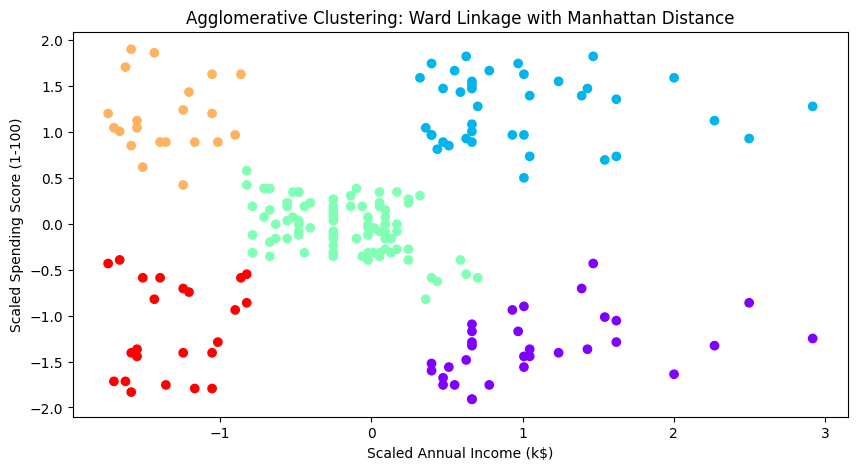

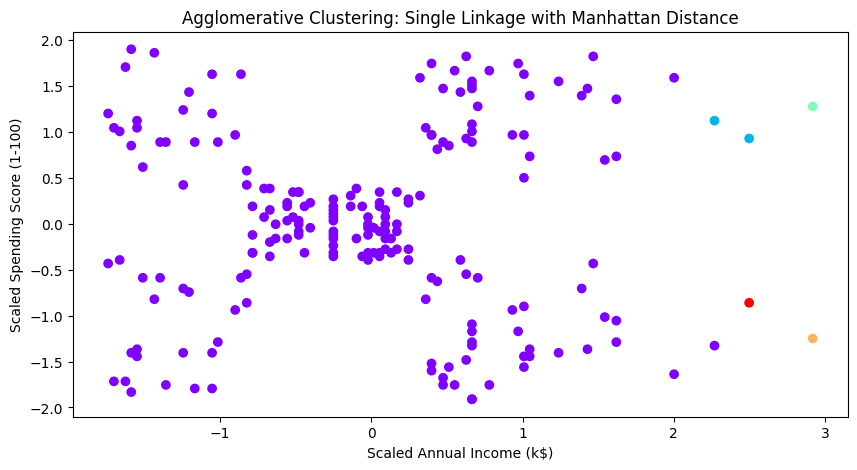

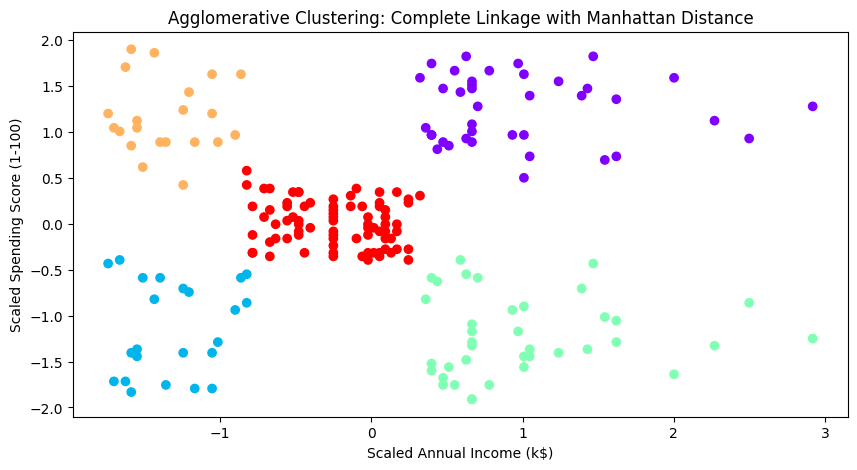

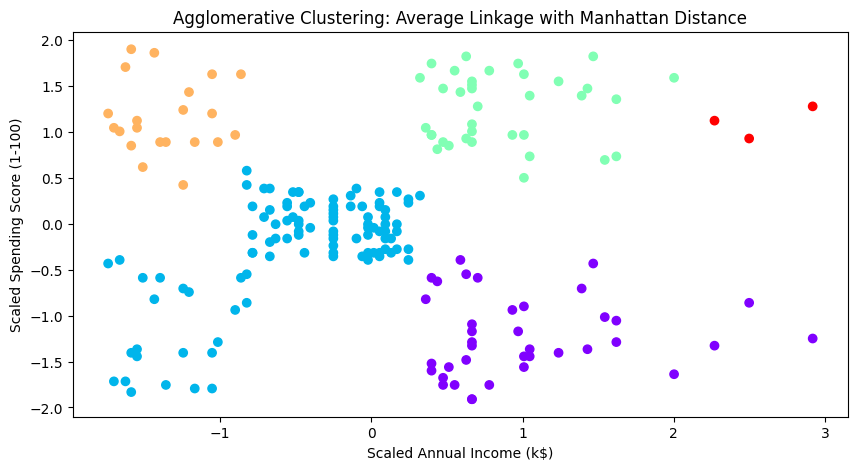

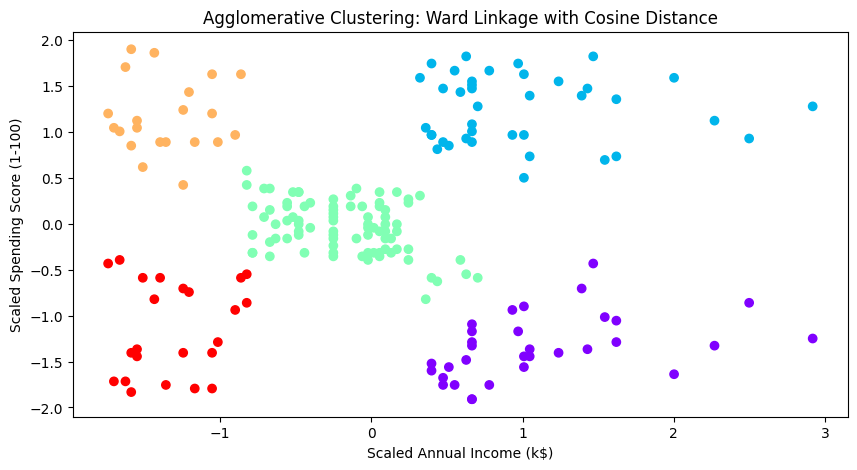

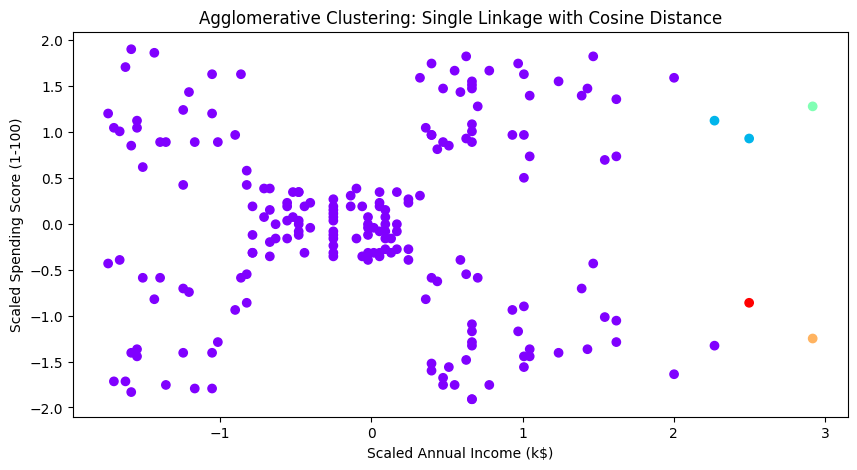

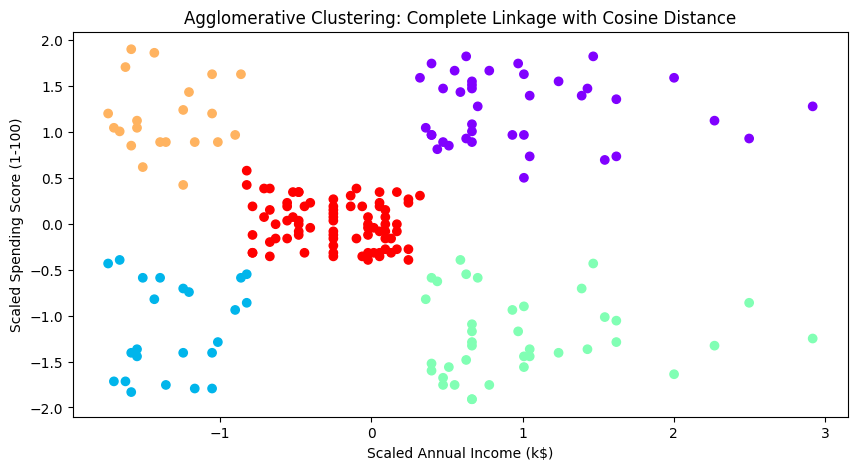

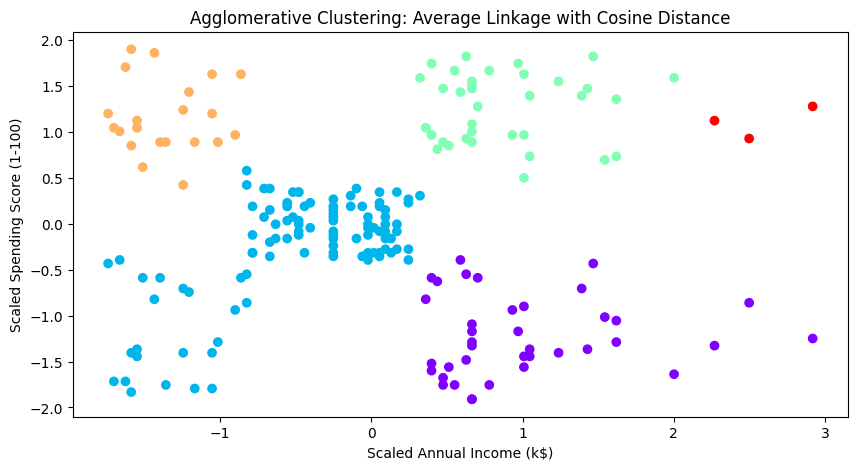

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

# Pre-process the data
data.fillna(data.mean(numeric_only=True), inplace=True)

# Select two attributes for clustering (e.g., 'Annual Income (k$)' and 'Spending Score (1-100)')
selected_attributes = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the selected attributes
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_attributes)

# Apply Agglomerative Clustering with different distance metrics and linkage methods
distance_metrics = ['euclidean', 'manhattan', 'cosine']
linkage_methods = ['ward', 'single', 'complete', 'average']

# Perform clustering and plot results for each combination
for metric in distance_metrics:
    for linkage_method in linkage_methods:
        clustering = AgglomerativeClustering(n_clusters=5,linkage=linkage_method)
        cluster_labels = clustering.fit_predict(scaled_data)

        # Plotting the results
        plt.figure(figsize=(10, 5))
        plt.title(f'Agglomerative Clustering: {linkage_method.capitalize()} Linkage with {metric.capitalize()} Distance')
        plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='rainbow')
        plt.xlabel('Scaled Annual Income (k$)')
        plt.ylabel('Scaled Spending Score (1-100)')
        plt.show()


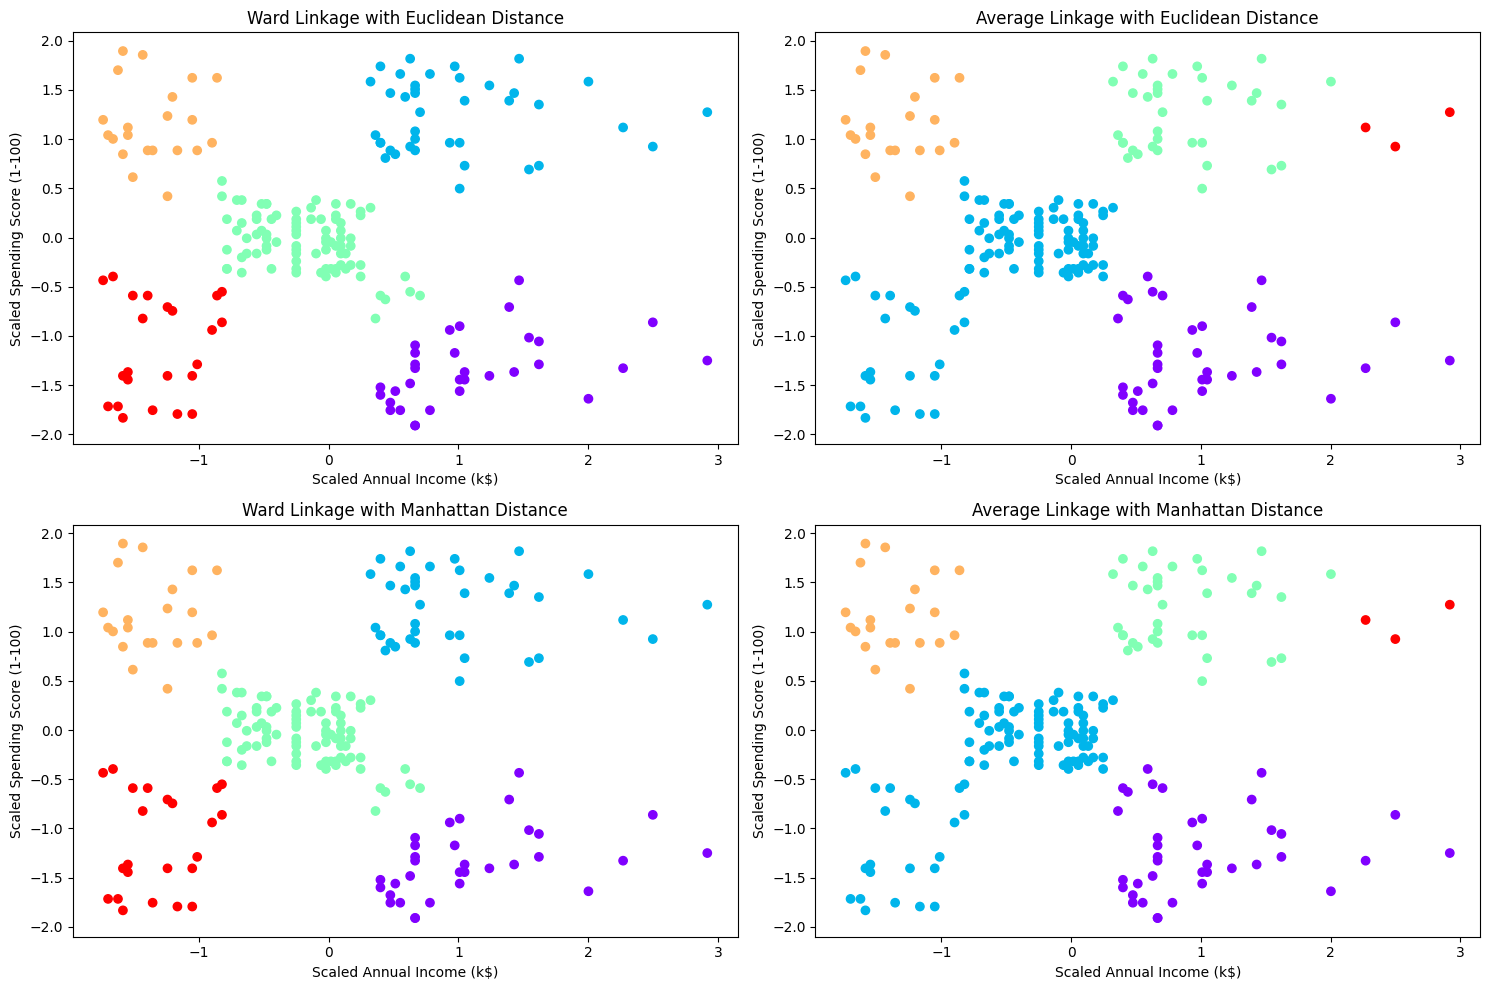

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

# Pre-process the data
data.fillna(data.mean(numeric_only=True), inplace=True)

# Select two attributes for clustering (e.g., 'Annual Income (k$)' and 'Spending Score (1-100)')
selected_attributes = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the selected attributes
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_attributes)

# Apply Agglomerative Clustering with different distance metrics and linkage methods
distance_metrics = ['euclidean', 'manhattan']
linkage_methods = ['ward', 'average']

# Create a figure for plotting
plt.figure(figsize=(15, 10))

# Perform clustering and plot results for each combination
for i, metric in enumerate(distance_metrics):
    for j, linkage_method in enumerate(linkage_methods):
        clustering = AgglomerativeClustering(n_clusters=5,linkage=linkage_method)
        cluster_labels = clustering.fit_predict(scaled_data)

        plt.subplot(len(distance_metrics), len(linkage_methods), i * len(linkage_methods) + j + 1)
        plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='rainbow')
        plt.title(f'{linkage_method.capitalize()} Linkage with {metric.capitalize()} Distance')
        plt.xlabel('Scaled Annual Income (k$)')
        plt.ylabel('Scaled Spending Score (1-100)')

plt.tight_layout()
plt.show()

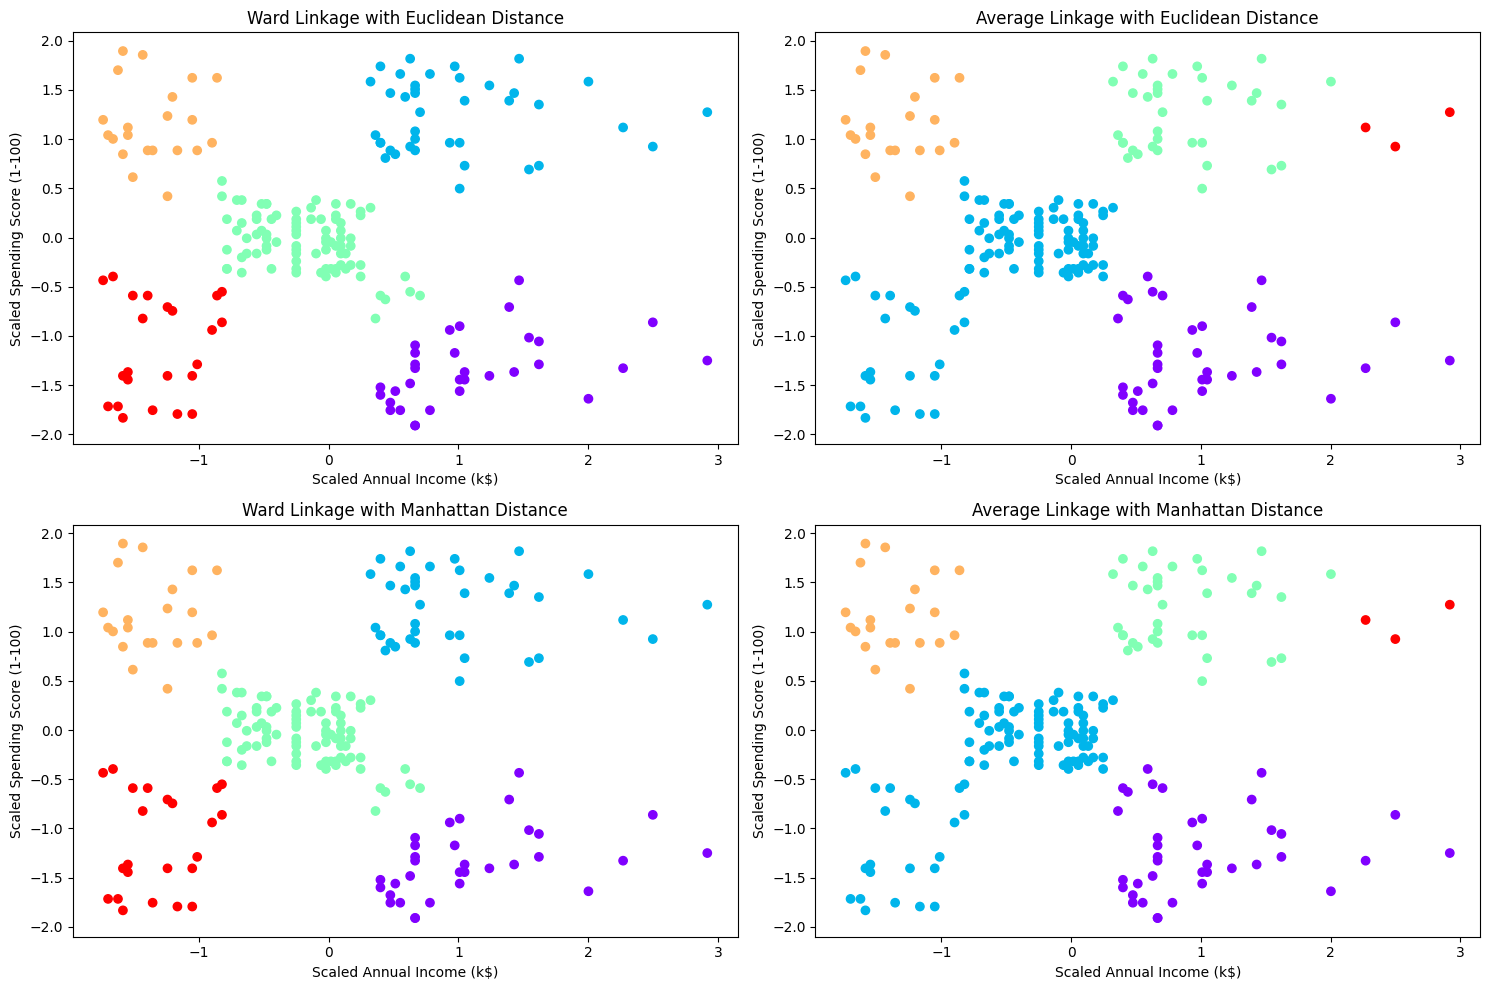

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

# Pre-process the data
data.fillna(data.mean(numeric_only=True), inplace=True)

# Select two attributes for clustering (e.g., 'Annual Income (k$)' and 'Spending Score (1-100)')
selected_attributes = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the selected attributes
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_attributes)

# Apply Agglomerative Clustering with different distance metrics and linkage methods
distance_metrics = ['euclidean', 'manhattan']
linkage_methods = ['ward', 'average']

# Create a figure for plotting
plt.figure(figsize=(15, 10))

# Perform clustering and plot results for each combination
for i, metric in enumerate(distance_metrics):
    for j, linkage_method in enumerate(linkage_methods):
        clustering = AgglomerativeClustering(n_clusters=5,linkage=linkage_method)
        cluster_labels = clustering.fit_predict(scaled_data)

        plt.subplot(len(distance_metrics), len(linkage_methods), i * len(linkage_methods) + j + 1)
        plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='rainbow')
        plt.title(f'{linkage_method.capitalize()} Linkage with {metric.capitalize()} Distance')
        plt.xlabel('Scaled Annual Income (k$)')
        plt.ylabel('Scaled Spending Score (1-100)')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, mutual_info_score

# Load the dataset
data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

# Pre-process the data
data.fillna(data.mean(numeric_only=True), inplace=True)

# Select two attributes for clustering (e.g., 'Annual Income (k$)' and 'Spending Score (1-100)')
selected_attributes = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the selected attributes
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_attributes)

# Apply Agglomerative Clustering with different distance metrics and linkage methods
distance_metrics = ['euclidean', 'manhattan']
linkage_methods = ['ward', 'average']

# Store evaluation metrics
results = []

for metric in distance_metrics:
    for linkage_method in linkage_methods:
        clustering = AgglomerativeClustering(n_clusters=5,linkage=linkage_method)
        cluster_labels = clustering.fit_predict(scaled_data)

        # Calculate evaluation metrics
        silhouette_avg = silhouette_score(scaled_data, cluster_labels)
        davies_bouldin = davies_bouldin_score(scaled_data, cluster_labels)

        # For Mutual Information, we need ground truth labels; here we use the Genre as a proxy
        label_encoder = LabelEncoder()
        true_labels = label_encoder.fit_transform(data['Genre'])
        mutual_info = mutual_info_score(true_labels, cluster_labels)

        # Append results to the list
        results.append({
            'Distance Metric': metric,
            'Linkage Method': linkage_method,
            'Silhouette Score': silhouette_avg,
            'Davies-Bouldin Index': davies_bouldin,
            'Mutual Information': mutual_info
        })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

  Distance Metric Linkage Method  Silhouette Score  Davies-Bouldin Index  \
0       euclidean           ward          0.553809              0.577862   
1       euclidean        average          0.479426              0.643251   
2       manhattan           ward          0.553809              0.577862   
3       manhattan        average          0.479426              0.643251   

   Mutual Information  
0            0.006985  
1            0.005952  
2            0.006985  
3            0.005952  


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for somoclu: filename=somoclu-1.7.6-cp310-cp310-linux_x86_64.whl size=595986 sha256=fdafaab026f95f6fa8d1a29313bf09514b81978728fe849a5d8b8437a5eb79ae
  Stored in directory: /root/.cache/pip/wheels/59/c3/65/d78959b2e432af6e863523efe8d1faa21111c1cc7fd4e04436
Successfully built somoclu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

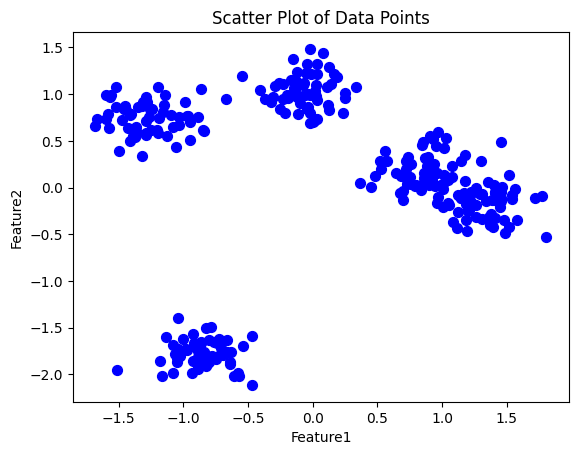

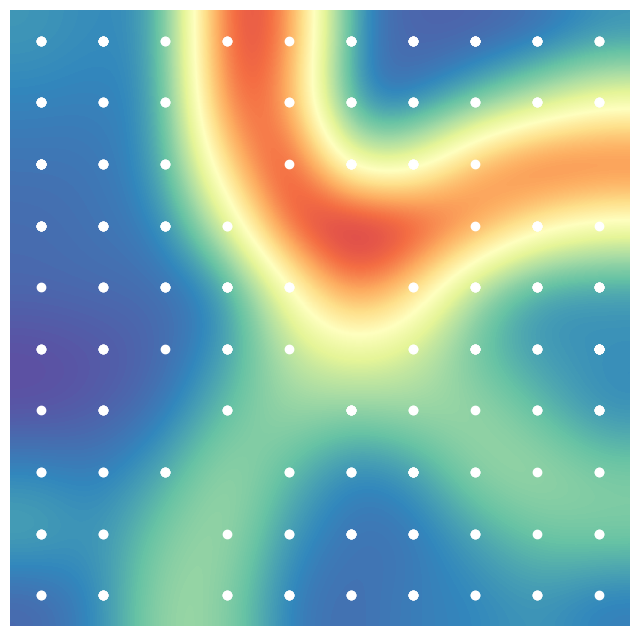

Initial KMeans clustering on SOM grid with 5 clusters


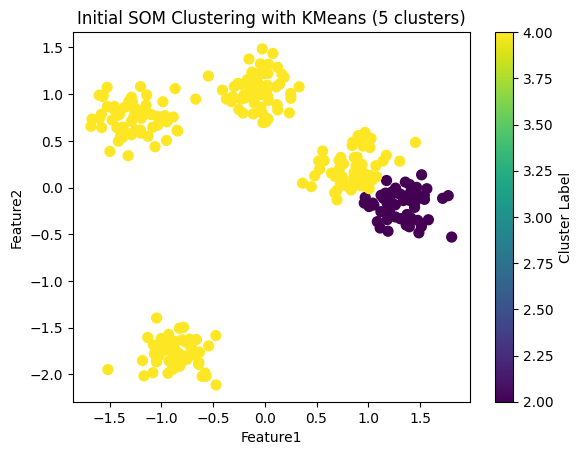

For n_clusters = 2
Silhouette Score: 0.50926685
Davies-Bouldin Score: 1.0324041356456006


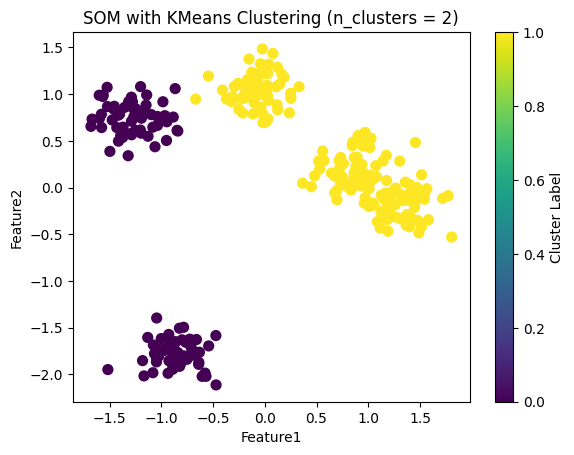

For n_clusters = 3
Silhouette Score: 0.70869386
Davies-Bouldin Score: 0.4443999874110081


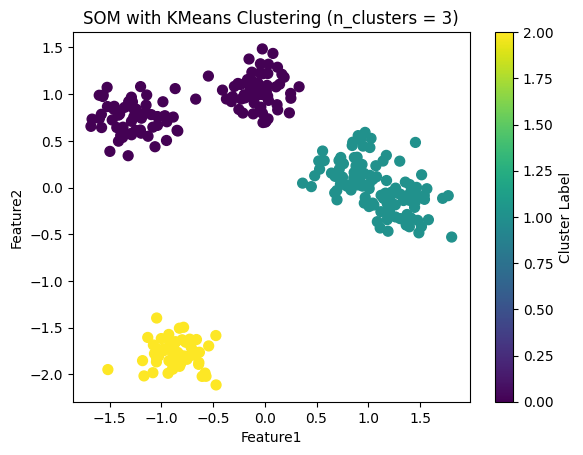

For n_clusters = 4
Silhouette Score: 0.7335522
Davies-Bouldin Score: 0.33834228692914764


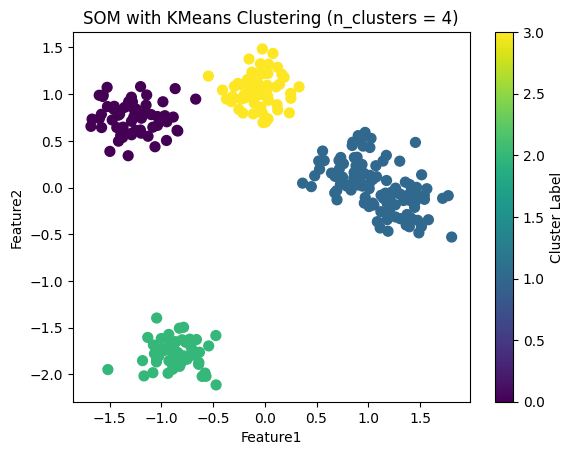

For n_clusters = 5
Silhouette Score: 0.66026783
Davies-Bouldin Score: 0.48895492491611214


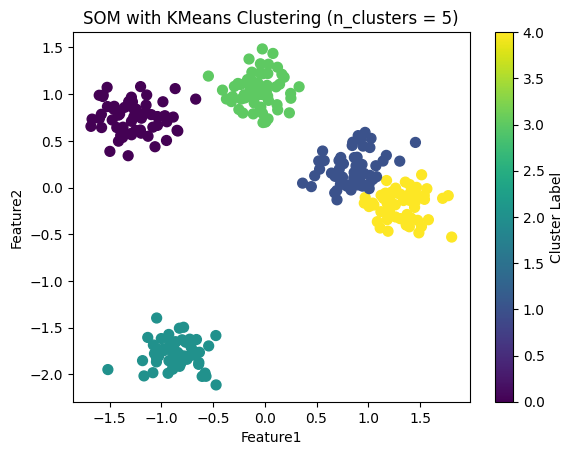

For n_clusters = 6
Silhouette Score: 0.66026783
Davies-Bouldin Score: 0.48895492491611214


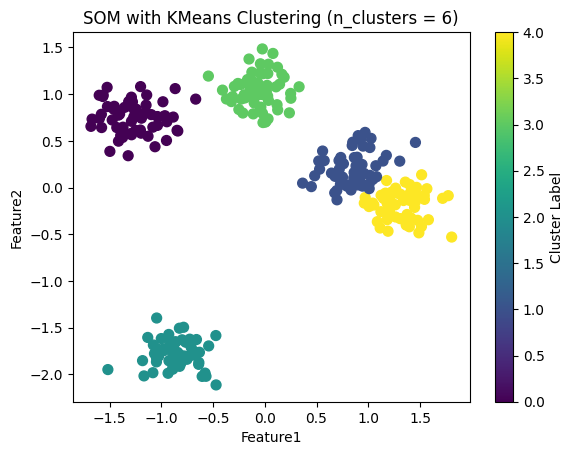

For n_clusters = 7
Silhouette Score: 0.5722446
Davies-Bouldin Score: 0.6713784368595491


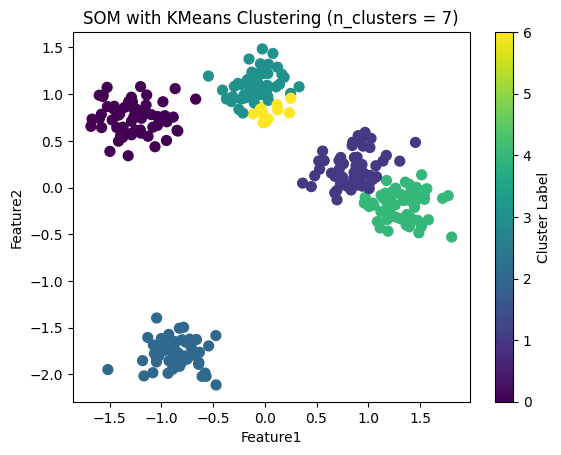

In [ ]:
# Install necessary libraries
!pip install somoclu scikit-learn matplotlib

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from somoclu import Somoclu

# Generate and save a synthetic dataset for consistency
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=5, cluster_std=1.0, random_state=42)
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data['Target'] = y
data.to_csv('synthetic_dataset.csv', index=False)

# Display download link for the dataset in Google Colab
from google.colab import files
files.download('synthetic_dataset.csv')

# Reload dataset from the saved file for clustering
data = pd.read_csv('synthetic_dataset.csv')

# Step 2: Conduct the pre-processing steps (scaling)
scaler = StandardScaler()
data[['Feature1', 'Feature2']] = scaler.fit_transform(data[['Feature1', 'Feature2']])

# Step 3: Remove the target variable
X = data.drop(columns=['Target'], axis=1).values.astype(np.float32)  # Ensure 32-bit float for somoclu

# Step 4: Plot the datapoints using scatter plots
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=50)
plt.title('Scatter Plot of Data Points')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

# Step 5: Apply SOM clustering and determine the optimal number of clusters
n_rows, n_columns = 10, 10  # 10x10 grid for SOM
som = Somoclu(n_columns, n_rows, compactsupport=False)

# Train the SOM model
som.train(X)

# Visualize the U-Matrix for cluster boundary estimation
som.view_umatrix(bestmatches=True)

# Obtain cluster labels with KMeans on SOM codebook for initial cluster assignment
som_codebook = som.codebook.reshape(-1, X.shape[1])  # Flatten the SOM grid
kmeans = KMeans(n_clusters=5, random_state=42)  # Set initial clusters
som_labels = kmeans.fit_predict(som_codebook)
print("Initial KMeans clustering on SOM grid with 5 clusters")

# Plot initial cluster labels
plt.scatter(X[:, 0], X[:, 1], c=som_labels[kmeans.predict(X)], cmap='viridis', s=50)
plt.title('Initial SOM Clustering with KMeans (5 clusters)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.colorbar(label='Cluster Label')
plt.show()

# Step 7-9: Repeat clustering with KMeans for different values of 'n_clusters' and evaluate performance metrics
for n_clusters in range(2, 8):  # Trying 2 to 7 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(som_codebook)

    # Map SOM data points to KMeans labels
    data_labels = kmeans.predict(X)

    # Step 8: Measure silhouette score and Davies-Bouldin score
    silhouette_avg = silhouette_score(X, data_labels)
    db_score = davies_bouldin_score(X, data_labels)
    print(f"For n_clusters = {n_clusters}")
    print("Silhouette Score:", silhouette_avg)
    print("Davies-Bouldin Score:", db_score)

    # Step 9: Plot cluster centroids and labels
    plt.scatter(X[:, 0], X[:, 1], c=data_labels, cmap='viridis', s=50)
    plt.title(f'SOM with KMeans Clustering (n_clusters = {n_clusters})')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.colorbar(label='Cluster Label')
    plt.show()
